In [65]:
from stepping_stones import SteppingStones, Stone
from mip_solver import footstep_plan
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [78]:
# make stepping stones
stones = SteppingStones()
stones.add_stones(Stone(np.array([0,0]), 1.0, 1.0))
stones.add_stones(Stone(np.array([1.25,0]), 1.0, 1.0))

In [79]:
# plot stone
def plot_stone(ax, stone: Stone):
    
    kwargs = {}
    kwargs['edgecolor'] = 'black'
    kwargs['facecolor'] = 'grey'
    
    width = stone.width
    height = stone.height
    center = stone.center
    
    c2c = np.array([width, height]) / 2
    top_right = center + c2c
    bottom_left = center - c2c
    
    rect = Rectangle(bottom_left, width, height, fill=True, **kwargs)
    ax.add_patch(rect)

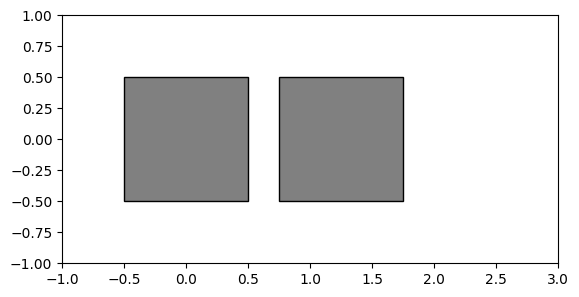

In [83]:
#plot terrain
fig, ax = plt.subplots()
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 1)
for stone in stones.stones:
    plot_stone(ax, stone)
ax.set_aspect('equal')
plt.show()

In [81]:
decision_var = footstep_plan(stones, 12, 0.8, use_gurobi=False)


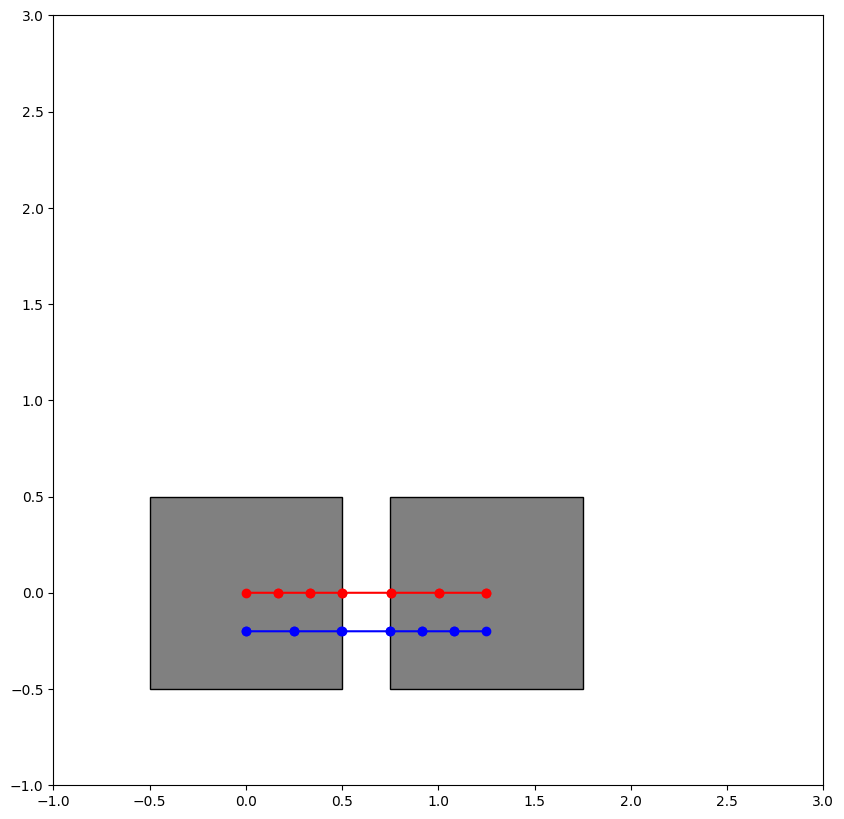

In [86]:
# get left_foot positions
left_foot, right_foot, _, __, ___ = decision_var

# plot foot pos
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 3)
for stone in stones.stones:
    plot_stone(ax, stone)

ax.plot(left_foot[:,0], left_foot[:,1], 'ro')
ax.plot(left_foot[:,0], left_foot[:,1], 'r')
ax.plot(right_foot[:,0], right_foot[:,1], 'bo')
ax.plot(right_foot[:,0], right_foot[:,1], 'b')
ax.set_aspect('equal')
plt.show()

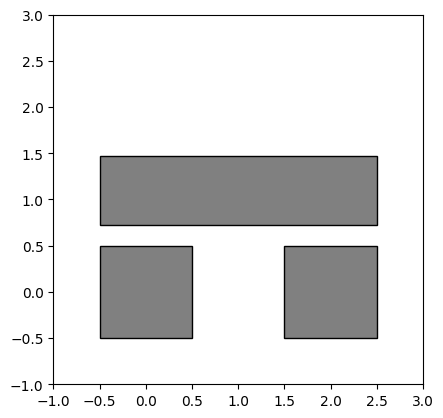

In [59]:
stones = SteppingStones()
stones.add_stones(Stone(np.array([0,0]), 1.0, 1.0))
stones.add_stones(Stone(np.array([1.0,1.1]), 3.0, 0.75))
stones.add_stones(Stone(np.array([2.0,0]), 1.0, 1.0))

fig, ax = plt.subplots()
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 3)
for stone in stones.stones:
    plot_stone(ax, stone)
ax.set_aspect('equal')
plt.show()

In [60]:
def get_M(stepping_stones: SteppingStones):
    # big-M parameter for the horizontal axis
    initial = stepping_stones.stones[0]
    goal = stepping_stones.stones[-1]
    M = [goal.center[0] - initial.center[0]]

    # big-M parameter for the vertical axis
    lateral = stepping_stones.stones[1]
    M.append(lateral.top_right[1] - initial.center[1])
    
    return np.array(M * 2) * 2

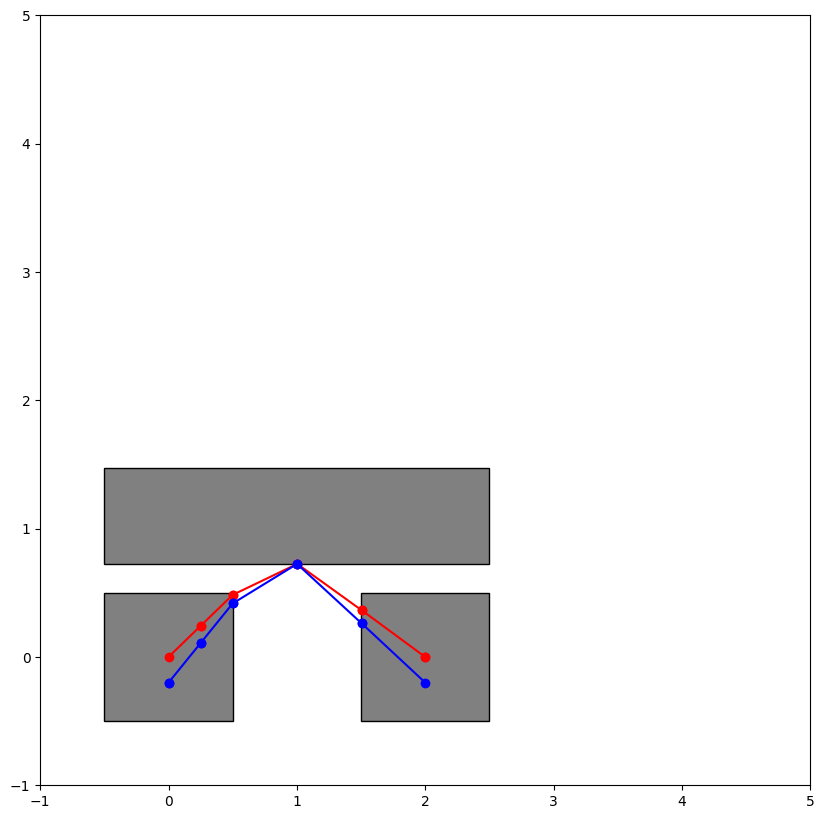

In [61]:
decision_var = footstep_plan(stones, 10, 0.8, M_fn=get_M)
# get foot positions
left_foot, right_foot, _, __, ___ = decision_var

# plot foot pos
#set figsize
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
for stone in stones.stones:
    plot_stone(ax, stone)

ax.plot(left_foot[:,0], left_foot[:,1], 'ro')
ax.plot(left_foot[:,0], left_foot[:,1], 'r')
ax.plot(right_foot[:,0], right_foot[:,1], 'bo')
ax.plot(right_foot[:,0], right_foot[:,1], 'b')
ax.set_aspect('equal')
plt.show()

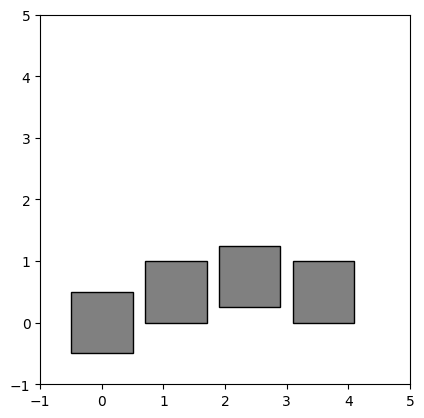

In [87]:
stones = SteppingStones()
gap = 0.2
stones.add_stones(Stone(np.array([0,0]), 1.0, 1.0))
stones.add_stones(Stone(np.array([1+gap,0.5]), 1.0, 1.0))
stones.add_stones(Stone(np.array([2+2*gap,0.75]), 1.0, 1.0))
stones.add_stones(Stone(np.array([3+3*gap,0.5]), 1.0, 1.0))
# stones.add_stones(Stone(np.array([0.5,4+4*gap]), 1.0, 1.0))

fig, ax = plt.subplots()
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
for stone in stones.stones:
    plot_stone(ax, stone)
ax.set_aspect('equal')
plt.show()

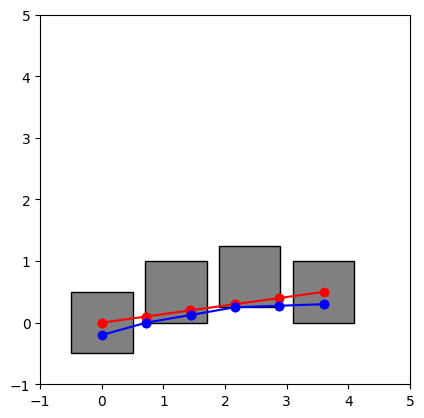

In [88]:
decision_var = footstep_plan(stones, 10, 0.8)
# get foot positions
left_foot, right_foot, _, __, ___ = decision_var

# plot foot pos
fig, ax = plt.subplots()
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
for stone in stones.stones:
    plot_stone(ax, stone)

ax.plot(left_foot[:,0], left_foot[:,1], 'ro')
ax.plot(left_foot[:,0], left_foot[:,1], 'r')
ax.plot(right_foot[:,0], right_foot[:,1], 'bo')
ax.plot(right_foot[:,0], right_foot[:,1], 'b')
ax.set_aspect('equal')
plt.show()